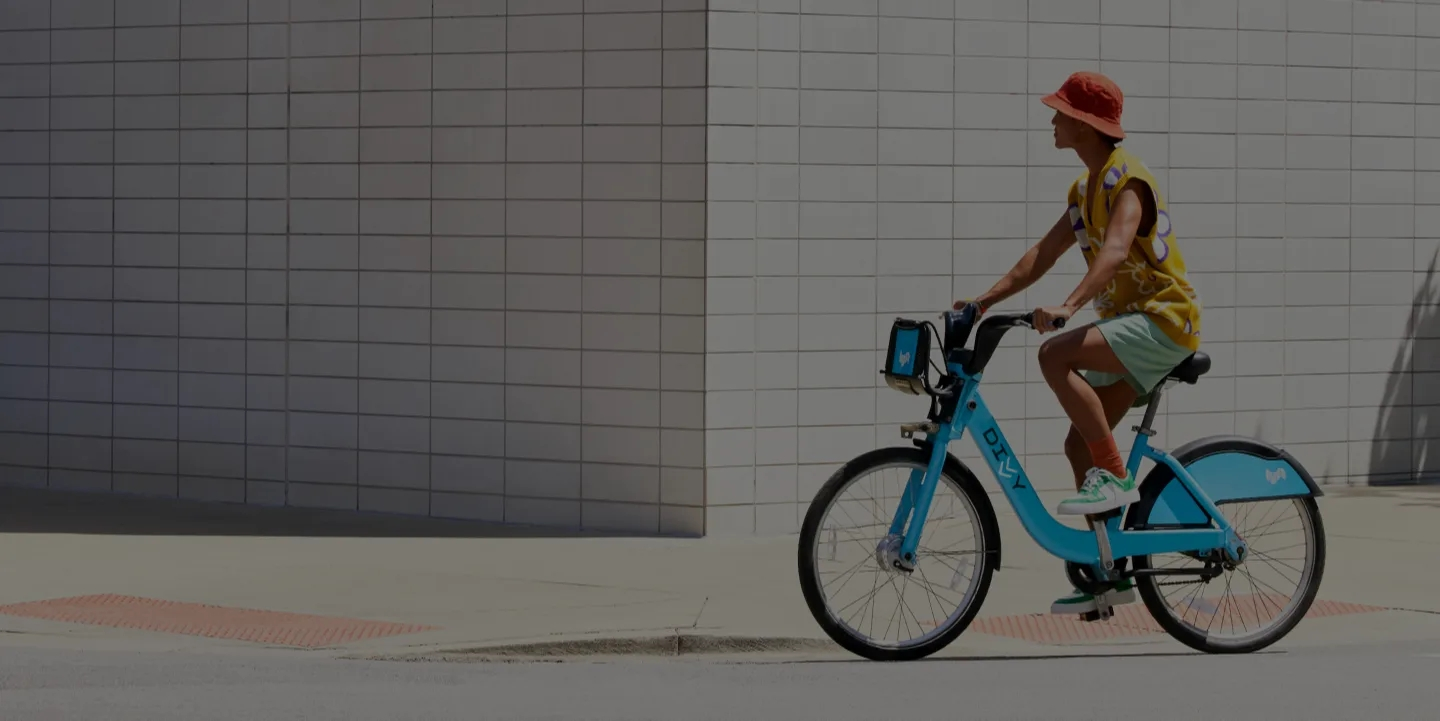

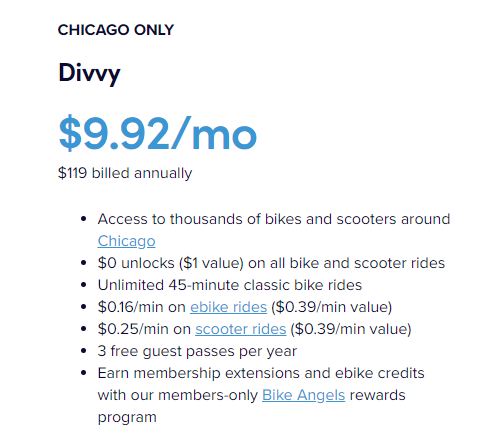

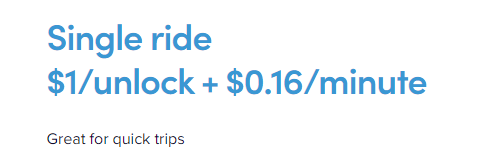

# Data analysis of Divvy bike rental  in Chicago

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from math import radians, cos, sin, asin, sqrt
import seaborn as sns
plt.style.use('ggplot')
%matplotlib inline

# Loading data 

In [2]:
# Loading 2 years of data from 2021 to 2022 
# The original data can be downloaded from https://divvy-tripdata.s3.amazonaws.com/index.html
df_202212 = pd.read_csv("D:/data/tripdata/202212-divvy-tripdata.csv")
df_202211 = pd.read_csv("D:/data/tripdata/202211-divvy-tripdata.csv")
df_202210 = pd.read_csv("D:/data/tripdata/202210-divvy-tripdata.csv")
df_202209 = pd.read_csv("D:/data/tripdata/202209-divvy-tripdata.csv")
df_202208 = pd.read_csv("D:/data/tripdata/202208-divvy-tripdata.csv")
df_202207 = pd.read_csv("D:/data/tripdata/202207-divvy-tripdata.csv")
df_202206 = pd.read_csv("D:/data/tripdata/202206-divvy-tripdata.csv")
df_202205 = pd.read_csv("D:/data/tripdata/202205-divvy-tripdata.csv")
df_202204 = pd.read_csv("D:/data/tripdata/202204-divvy-tripdata.csv")
df_202203 = pd.read_csv("D:/data/tripdata/202203-divvy-tripdata.csv")
df_202202 = pd.read_csv("D:/data/tripdata/202202-divvy-tripdata.csv")
df_202201 = pd.read_csv("D:/data/tripdata/202201-divvy-tripdata.csv")
df_202112 = pd.read_csv("D:/data/tripdata/202112-divvy-tripdata.csv")
df_202111 = pd.read_csv("D:/data/tripdata/202111-divvy-tripdata.csv")
df_202110 = pd.read_csv("D:/data/tripdata/202110-divvy-tripdata.csv")
df_202109 = pd.read_csv("D:/data/tripdata/202109-divvy-tripdata.csv")
df_202108 = pd.read_csv("D:/data/tripdata/202108-divvy-tripdata.csv")
df_202107 = pd.read_csv("D:/data/tripdata/202107-divvy-tripdata.csv")
df_202106 = pd.read_csv("D:/data/tripdata/202106-divvy-tripdata.csv")
df_202105 = pd.read_csv("D:/data/tripdata/202105-divvy-tripdata.csv")
df_202104 = pd.read_csv("D:/data/tripdata/202104-divvy-tripdata.csv")
df_202103 = pd.read_csv("D:/data/tripdata/202103-divvy-tripdata.csv")
df_202102 = pd.read_csv("D:/data/tripdata/202102-divvy-tripdata.csv")
df_202101 = pd.read_csv("D:/data/tripdata/202101-divvy-tripdata.csv")

In [3]:
#loading data regarding weather from https://open-meteo.com
df_weather = pd.read_csv("D:/data/tripdata/weather.csv")

In [4]:
df_weather.head(10)

,time,temperature,relative_humidity,rain,snowfall,direct_radiation,windspeed
0,2021-01-01T00:00,-1.4,76,0.0,0.00,0,9.0
1,2021-01-01T01:00,-1.8,79,0.0,0.00,0,12.6
2,2021-01-01T02:00,-1.7,80,0.0,0.00,0,15.5
3,2021-01-01T03:00,-1.6,81,0.0,0.00,0,15.5
4,2021-01-01T04:00,-1.8,81,0.0,0.00,0,14.0
5,2021-01-01T05:00,-1.8,81,0.0,0.00,0,15.5
6,2021-01-01T06:00,-1.5,79,0.0,0.00,0,19.2
7,2021-01-01T07:00,-1.1,79,0.0,0.00,0,19.9
8,2021-01-01T08:00,-0.7,79,0.0,0.00,0,19.8
9,2021-01-01T09:00,-0.5,79,0.0,0.07,0,22.3


In [5]:
df_weather['time'] = df_weather['time'].apply(lambda x: x.replace('T',' '))

In [6]:
df_weather['time'] = pd.to_datetime(df_weather['time'],format='%Y-%m-%d %H:%M')

In [7]:
df_weather['date'] = df_weather['time'].dt.date
df_weather['hour'] = df_weather['time'].dt.hour

In [8]:
df_2022 = [df_202212,df_202211,df_202210,df_202209,df_202208,df_202207,df_202206,df_202205,df_202204,df_202203,df_202202,df_202201]
df_2021 = [df_202112,df_202111,df_202110,df_202109,df_202108,df_202107,df_202106,df_202105,df_202104,df_202103,df_202102,df_202101]
df_total = [df_202212,df_202211,df_202210,df_202209,df_202208,df_202207,df_202206,df_202205,df_202204,df_202203,df_202202,df_202201,
           df_202112,df_202111,df_202110,df_202109,df_202108,df_202107,df_202106,df_202105,df_202104,df_202103,df_202102,df_202101]

In [9]:
# Check the consistancy of columns' name in all tables
def all_equal(iterator):
    iterator = iter(iterator)
    try:
        first = next(iterator)
    except StopIteration:
        return True
    return all(first == x for x in iterator)
df_total_columns = []
for df in df_total:
    temp_name = df.columns.to_list()
    temp_name.sort()
    df_total_columns.append(temp_name)
all_equal(df_total_columns) # if it returns True, all the column names keep consistent in all files

True

In [10]:
df_bike = pd.concat(df_total) # Merge all data into one dataframe

In [11]:
df_bike.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,65DBD2F447EC51C2,electric_bike,2022-12-05 10:47:18,2022-12-05 10:56:34,Clifton Ave & Armitage Ave,TA1307000163,Sedgwick St & Webster Ave,13191,41.918244,-87.657115,41.922167,-87.638888,member
1,0C201AA7EA0EA1AD,classic_bike,2022-12-18 06:42:33,2022-12-18 07:08:44,Broadway & Belmont Ave,13277,Sedgwick St & Webster Ave,13191,41.940106,-87.645451,41.922167,-87.638888,casual
2,E0B148CCB358A49D,electric_bike,2022-12-13 08:47:45,2022-12-13 08:59:51,Sangamon St & Lake St,TA1306000015,St. Clair St & Erie St,13016,41.885919,-87.651133,41.894345,-87.622798,member
3,54C5775D2B7C9188,classic_bike,2022-12-13 18:50:47,2022-12-13 19:19:48,Shields Ave & 31st St,KA1503000038,Damen Ave & Madison St,13134,41.838464,-87.635406,41.881370,-87.674930,member
4,A4891F78776D35DF,classic_bike,2022-12-14 16:13:39,2022-12-14 16:27:50,Ashland Ave & Chicago Ave,13247,Damen Ave & Charleston St,13288,41.895954,-87.667728,41.920082,-87.677855,casual


In [12]:
df_bike['started_at'] = pd.to_datetime(df_bike['started_at'],format='%Y-%m-%d %H:%M:%S')

In [13]:
df_bike['ended_at'] = pd.to_datetime(df_bike['ended_at'],format='%Y-%m-%d %H:%M:%S')

In [14]:
df_bike['duration'] = df_bike['ended_at'] - df_bike['started_at']

In [15]:
df_bike['duration'] = df_bike['duration'].dt.seconds/60

In [16]:
df_bike['started_at_date'] = df_bike['started_at'].dt.date

In [17]:
df_bike['started_at_hour'] = df_bike['started_at'].dt.hour

In [18]:
#Joining two data sets of weather and bike
df = df_bike.merge(df_weather,how='left',left_on=['started_at_date','started_at_hour'], right_on=['date','hour'])

In [19]:
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,...,started_at_hour,time,temperature,relative_humidity,rain,snowfall,direct_radiation,windspeed,date,hour
0,65DBD2F447EC51C2,electric_bike,2022-12-05 10:47:18,2022-12-05 10:56:34,Clifton Ave & Armitage Ave,TA1307000163,Sedgwick St & Webster Ave,13191,41.918244,-87.657115,...,10,2022-12-05 10:00:00,1.5,63,0.0,0.0,25,16.5,2022-12-05,10
1,0C201AA7EA0EA1AD,classic_bike,2022-12-18 06:42:33,2022-12-18 07:08:44,Broadway & Belmont Ave,13277,Sedgwick St & Webster Ave,13191,41.940106,-87.645451,...,6,2022-12-18 06:00:00,-5.4,69,0.0,0.0,0,22.1,2022-12-18,6
2,E0B148CCB358A49D,electric_bike,2022-12-13 08:47:45,2022-12-13 08:59:51,Sangamon St & Lake St,TA1306000015,St. Clair St & Erie St,13016,41.885919,-87.651133,...,8,2022-12-13 08:00:00,1.5,78,0.0,0.0,5,17.1,2022-12-13,8
3,54C5775D2B7C9188,classic_bike,2022-12-13 18:50:47,2022-12-13 19:19:48,Shields Ave & 31st St,KA1503000038,Damen Ave & Madison St,13134,41.838464,-87.635406,...,18,2022-12-13 18:00:00,3.3,69,0.0,0.0,0,20.9,2022-12-13,18
4,A4891F78776D35DF,classic_bike,2022-12-14 16:13:39,2022-12-14 16:27:50,Ashland Ave & Chicago Ave,13247,Damen Ave & Charleston St,13288,41.895954,-87.667728,...,16,2022-12-14 16:00:00,5.9,94,0.6,0.0,0,18.9,2022-12-14,16


In [20]:
df.shape

(11262780, 25)

In [21]:
df.isnull().sum() # Cheking missing values

ride_id                     0
rideable_type               0
started_at                  0
ended_at                    0
start_station_name    1523873
start_station_id      1523870
end_station_name      1631912
end_station_id        1631912
start_lat                   0
start_lng                   0
end_lat                 10629
end_lng                 10629
member_casual               0
duration                    0
started_at_date             0
started_at_hour             0
time                        0
temperature                 0
relative_humidity           0
rain                        0
snowfall                    0
direct_radiation            0
windspeed                   0
date                        0
hour                        0
dtype: int64

In [22]:
df.dropna(inplace = True)

In [23]:
df[df['duration']<0]

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,...,started_at_hour,time,temperature,relative_humidity,rain,snowfall,direct_radiation,windspeed,date,hour


array(['electric_bike', 'classic_bike', 'docked_bike'], dtype=object)

In [25]:
df.drop_duplicates(inplace = True)

Text(0, 0.5, 'Count of rides')

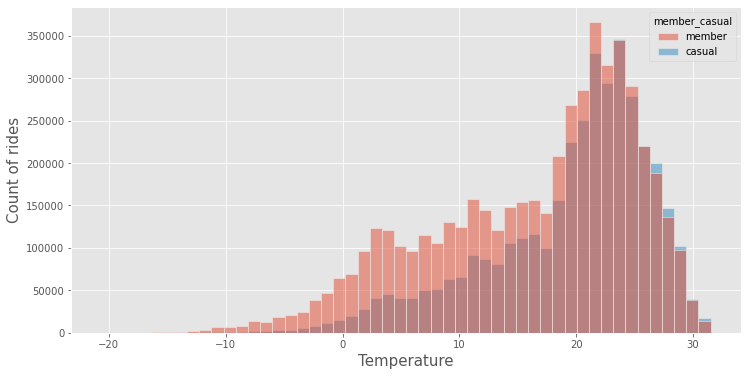

In [26]:
plt.figure(figsize=(12,6))
sns.histplot(x='temperature',data=df,bins=50,hue='member_casual')
plt.xlabel('Temperature',fontsize=15)
plt.ylabel('Count of rides',fontsize=15)

In [27]:
df['temperature_rnd'] = np.round(df['temperature'])

In [28]:
df_temp_cnt = df.groupby('temperature_rnd').agg({'ride_id':'count'}).reset_index()

<AxesSubplot:xlabel='temperature_rnd', ylabel='ride_id'>

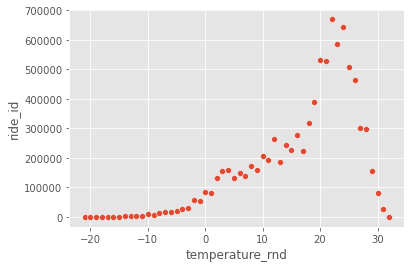

In [29]:
sns.scatterplot(x=df_temp_cnt['temperature_rnd'],y=df_temp_cnt['ride_id'])

Text(0, 0.5, 'Count of rides')

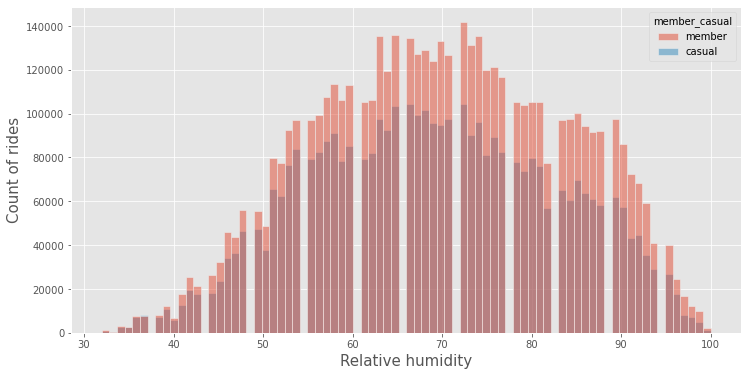

In [30]:
plt.figure(figsize=(12,6))
sns.histplot(x='relative_humidity',data=df,bins=80,hue='member_casual')
plt.xlabel('Relative humidity',fontsize=15)
plt.ylabel('Count of rides',fontsize=15)

In [31]:
df_hmdt_cnt = df.groupby('relative_humidity').agg({'ride_id':'count'}).reset_index()

<AxesSubplot:xlabel='relative_humidity', ylabel='ride_id'>

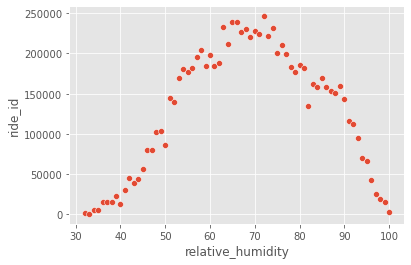

In [32]:
sns.scatterplot(x=df_hmdt_cnt['relative_humidity'],y=df_hmdt_cnt['ride_id'])

Text(0, 0.5, 'Count of rides')

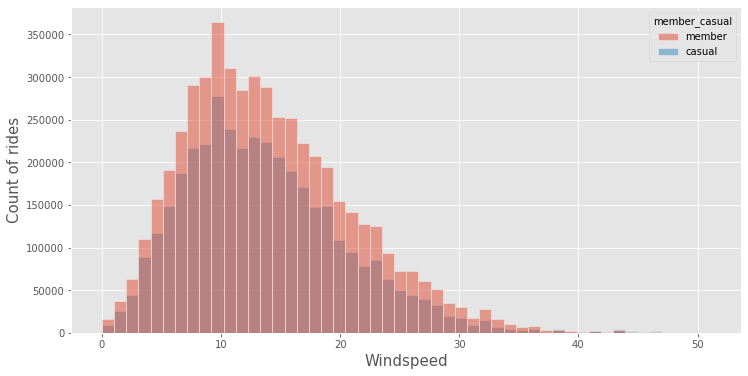

In [33]:
plt.figure(figsize=(12,6))
sns.histplot(x='windspeed',data=df,bins=50,hue='member_casual')
plt.xlabel('Windspeed',fontsize=15)
plt.ylabel('Count of rides',fontsize=15)

### The distribution analysis shows the preferable temperature, relative humidity, windspeed are around 23 (degree), 73%, 10 (km/h) respectively.
### Generally, riders with membership have a wider range of contribution to the number of rides than casual riders. It is the reason why we need to create chances to turn casual riders to registered riders.

In [34]:
df_bike_corr = df.groupby(by=['date']).agg({'ride_id':'count','temperature':'mean','windspeed':'mean','relative_humidity':'mean','rain':'mean','snowfall':'mean','direct_radiation':'mean'}).reset_index()

In [35]:
df_bike_corr.corr()

,ride_id,temperature,windspeed,relative_humidity,rain,snowfall,direct_radiation
ride_id,1.000000,0.899589,-0.303343,-0.127457,-0.038341,-0.265078,0.617732
temperature,0.899589,1.000000,-0.245802,0.031808,0.172271,-0.257051,0.463323
windspeed,-0.303343,-0.245802,1.000000,-0.133479,0.033247,0.114624,-0.210343
relative_humidity,-0.127457,0.031808,-0.133479,1.000000,0.403284,0.117724,-0.447011
rain,-0.038341,0.172271,0.033247,0.403284,1.000000,-0.029413,-0.275967
snowfall,-0.265078,-0.257051,0.114624,0.117724,-0.029413,1.000000,-0.245581
direct_radiation,0.617732,0.463323,-0.210343,-0.447011,-0.275967,-0.245581,1.000000


### Generally, the count of rides is highly related to temperature and direct_radiation and less related to windspeed, humidity, rain and snowfall.

In [36]:
df_bike_corr = df.groupby(by=['date','rideable_type','member_casual']).agg({'ride_id':'count','temperature':'mean','windspeed':'mean','relative_humidity':'mean','rain':'mean','snowfall':'mean','direct_radiation':'mean'}).reset_index()

In [37]:
df_bike_corr

,date,rideable_type,member_casual,ride_id,temperature,windspeed,relative_humidity,rain,snowfall,direct_radiation
0,2021-01-01,classic_bike,casual,97,-0.231959,21.111340,84.938144,0.613402,0.252577,0.226804
1,2021-01-01,classic_bike,member,514,-0.072763,22.074319,85.001946,0.612257,0.253035,0.284047
2,2021-01-01,docked_bike,casual,47,-0.531915,19.931915,83.680851,0.202128,0.102766,0.595745
3,2021-01-01,electric_bike,casual,69,-0.524638,20.217391,83.391304,0.533333,0.140000,0.289855
4,2021-01-01,electric_bike,member,152,-0.103289,22.448026,84.559211,0.528947,0.239013,0.342105
...,...,...,...,...,...,...,...,...,...,...
3644,2022-12-31,classic_bike,casual,585,1.023248,7.152991,84.254701,0.000000,0.000000,76.579487
3645,2022-12-31,classic_bike,member,1526,1.062975,5.542005,82.385976,0.000000,0.000000,98.840760
3646,2022-12-31,docked_bike,casual,126,1.287302,6.715079,82.849206,0.000000,0.000000,90.698413
3647,2022-12-31,electric_bike,casual,621,1.088084,6.645089,83.449275,0.000000,0.000000,83.206119


In [38]:
df_bike_corr[(df_bike_corr['rideable_type']=='classic_bike')&(df_bike_corr['member_casual']=='member')].corr()

,ride_id,temperature,windspeed,relative_humidity,rain,snowfall,direct_radiation
ride_id,1.000000,0.893466,-0.332418,-0.100862,-0.041997,-0.285009,0.558493
temperature,0.893466,1.000000,-0.250752,0.037909,0.169804,-0.255269,0.461360
windspeed,-0.332418,-0.250752,1.000000,-0.133094,0.038478,0.117737,-0.212089
relative_humidity,-0.100862,0.037909,-0.133094,1.000000,0.401391,0.116716,-0.444747
rain,-0.041997,0.169804,0.038478,0.401391,1.000000,-0.024584,-0.277112
snowfall,-0.285009,-0.255269,0.117737,0.116716,-0.024584,1.000000,-0.244373
direct_radiation,0.558493,0.461360,-0.212089,-0.444747,-0.277112,-0.244373,1.000000


In [39]:
df_bike_corr[(df_bike_corr['rideable_type']=='classic_bike')&(df_bike_corr['member_casual']=='casual')].corr()

,ride_id,temperature,windspeed,relative_humidity,rain,snowfall,direct_radiation
ride_id,1.000000,0.763400,-0.243255,-0.099814,-0.022970,-0.187098,0.572971
temperature,0.763400,1.000000,-0.242174,0.026895,0.169695,-0.260526,0.415839
windspeed,-0.243255,-0.242174,1.000000,-0.134200,0.021235,0.118924,-0.189397
relative_humidity,-0.099814,0.026895,-0.134200,1.000000,0.400298,0.114228,-0.461228
rain,-0.022970,0.169695,0.021235,0.400298,1.000000,-0.022517,-0.275534
snowfall,-0.187098,-0.260526,0.118924,0.114228,-0.022517,1.000000,-0.245499
direct_radiation,0.572971,0.415839,-0.189397,-0.461228,-0.275534,-0.245499,1.000000


In [40]:
df_bike_corr[(df_bike_corr['rideable_type']=='docked_bike')&(df_bike_corr['member_casual']=='casual')].corr()

,ride_id,temperature,windspeed,relative_humidity,rain,snowfall,direct_radiation
ride_id,1.000000,0.669954,-0.207419,-0.109513,-0.024482,-0.156123,0.505878
temperature,0.669954,1.000000,-0.223595,0.010443,0.188473,-0.236902,0.455044
windspeed,-0.207419,-0.223595,1.000000,-0.127351,0.007725,0.069708,-0.221228
relative_humidity,-0.109513,0.010443,-0.127351,1.000000,0.394176,0.121990,-0.471820
rain,-0.024482,0.188473,0.007725,0.394176,1.000000,-0.038234,-0.278485
snowfall,-0.156123,-0.236902,0.069708,0.121990,-0.038234,1.000000,-0.233442
direct_radiation,0.505878,0.455044,-0.221228,-0.471820,-0.278485,-0.233442,1.000000


In [41]:
df_bike_corr[(df_bike_corr['rideable_type']=='electric_bike')&(df_bike_corr['member_casual']=='member')].corr()

,ride_id,temperature,windspeed,relative_humidity,rain,snowfall,direct_radiation
ride_id,1.000000,0.656096,-0.202253,-0.120901,-0.045321,-0.255556,0.312833
temperature,0.656096,1.000000,-0.239851,0.050837,0.173626,-0.251601,0.495972
windspeed,-0.202253,-0.239851,1.000000,-0.139487,0.044709,0.115221,-0.227897
relative_humidity,-0.120901,0.050837,-0.139487,1.000000,0.402514,0.114867,-0.422588
rain,-0.045321,0.173626,0.044709,0.402514,1.000000,-0.033478,-0.272802
snowfall,-0.255556,-0.251601,0.115221,0.114867,-0.033478,1.000000,-0.239395
direct_radiation,0.312833,0.495972,-0.227897,-0.422588,-0.272802,-0.239395,1.000000


In [42]:
df_bike_corr[(df_bike_corr['rideable_type']=='electric_bike')&(df_bike_corr['member_casual']=='casual')].corr()

,ride_id,temperature,windspeed,relative_humidity,rain,snowfall,direct_radiation
ride_id,1.000000,0.812066,-0.265150,-0.112555,-0.021703,-0.231466,0.526593
temperature,0.812066,1.000000,-0.230294,0.032686,0.176445,-0.263536,0.475388
windspeed,-0.265150,-0.230294,1.000000,-0.140868,0.028430,0.107910,-0.205438
relative_humidity,-0.112555,0.032686,-0.140868,1.000000,0.404047,0.115850,-0.443597
rain,-0.021703,0.176445,0.028430,0.404047,1.000000,-0.040300,-0.267558
snowfall,-0.231466,-0.263536,0.107910,0.115850,-0.040300,1.000000,-0.245013
direct_radiation,0.526593,0.475388,-0.205438,-0.443597,-0.267558,-0.245013,1.000000


### Specifically, for members who take the electirc bike, the count of rides is less related to temperature and radiation compared with other cases. 

<AxesSubplot:>

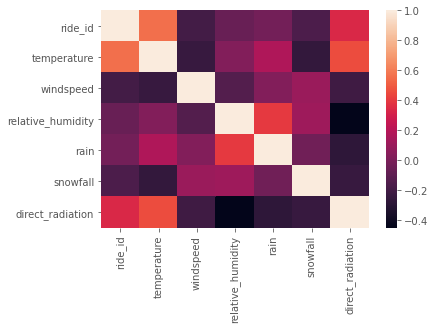

In [43]:
sns.heatmap(df_bike_corr.drop(columns='date').corr())

In [44]:
df_bike_type = df.groupby(by=['date','rideable_type']).agg({'ride_id':'count','temperature':'mean'}).reset_index()

Text(0, 0.5, 'Count of rides')

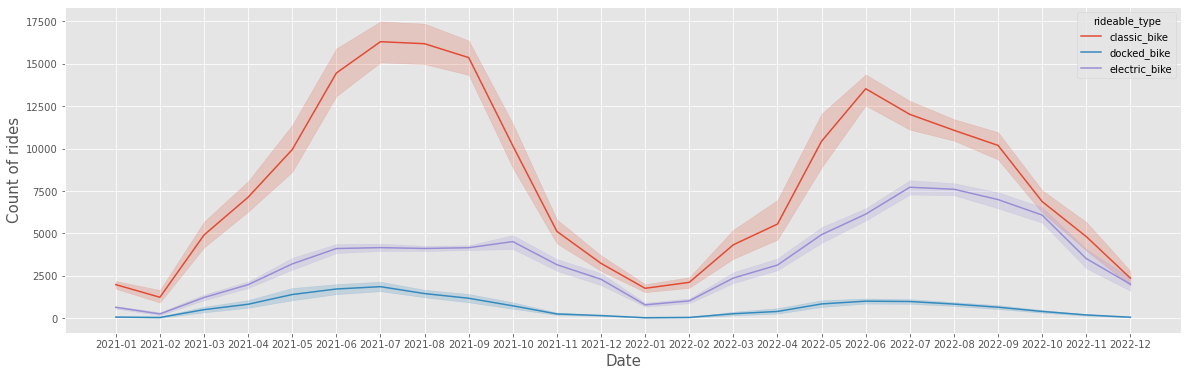

In [45]:
plt.figure(figsize=(20,6))
sns.lineplot(data=df_bike_type,x=pd.to_datetime(df_bike_type['date']).dt.strftime('%Y-%m'),y='ride_id',hue='rideable_type')
plt.xlabel('Date',fontsize=15)
plt.ylabel('Count of rides',fontsize=15)

In [46]:
df_rider = df.groupby(by=['date','member_casual']).agg({'ride_id':'count','duration':'sum'}).reset_index()

Text(0, 0.5, 'Duration')

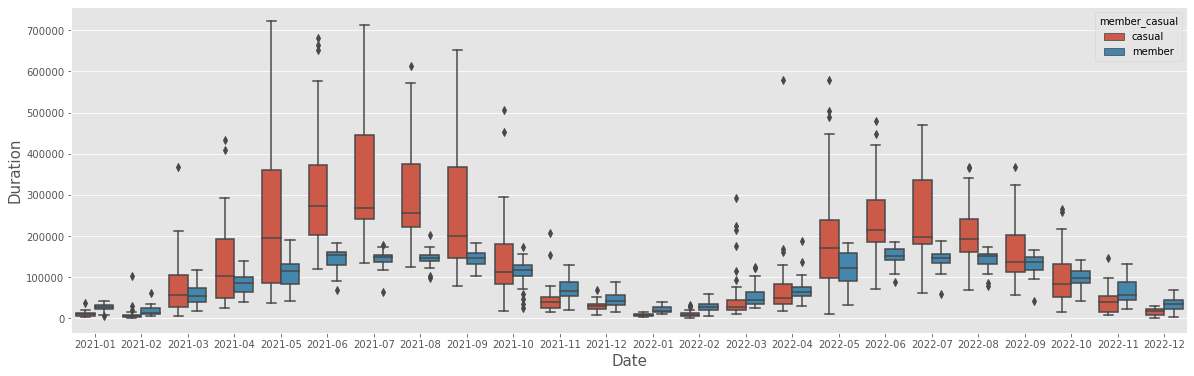

In [47]:
plt.figure(figsize=(20,6))
sns.boxplot(data=df_rider,x=pd.to_datetime(df_rider['date']).dt.strftime('%Y-%m'),y='duration',hue='member_casual')
plt.xlabel('Date',fontsize=15)
plt.ylabel('Duration',fontsize=15)

### Both count of bikes and duration show a seasonality over the two years. It is expected that summer section (Jun - Aug) has a better rent outcome than the winter section (Dec - Feb) 

In [51]:
df['day_of_week'] = df['started_at'].dt.day_of_week.map({0: 'Sun', 1: 'Mon',2:'Tue',3:'Wed',4:'Thur',5:'Fri',6:'Sat'})

Text(0, 0.5, 'Mean value of duration (mins)')

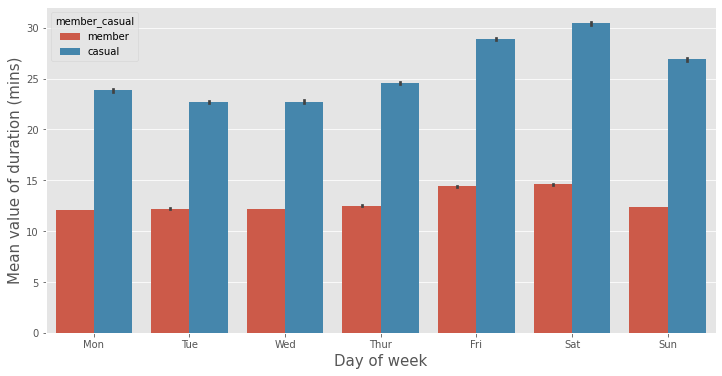

In [55]:
plt.figure(figsize=(12,6))
sns.barplot(data=df,x='day_of_week',y='duration',hue='member_casual',order=['Mon','Tue','Wed','Thur','Fri','Sat','Sun'])
plt.xlabel('Day of week',fontsize=15)
plt.ylabel('Mean value of duration (mins)',fontsize=15)

### Compared with regular members, casual riders have a significant increasing riding time on weekends.

In [56]:
df_member = df[df['member_casual']=='member']
df_casual = df[df['member_casual']=='casual']

In [57]:
df['rideable_type'].unique()

array(['electric_bike', 'classic_bike', 'docked_bike'], dtype=object)

In [58]:
df_member['rideable_type'].value_counts()

classic_bike     3689076
electric_bike    1462017
docked_bike            1
Name: rideable_type, dtype: int64

In [59]:
df_casual['rideable_type'].value_counts()

classic_bike     2150338
electric_bike    1169324
docked_bike       486906
Name: rideable_type, dtype: int64

Text(0.5, 1.0, 'Casual riders')

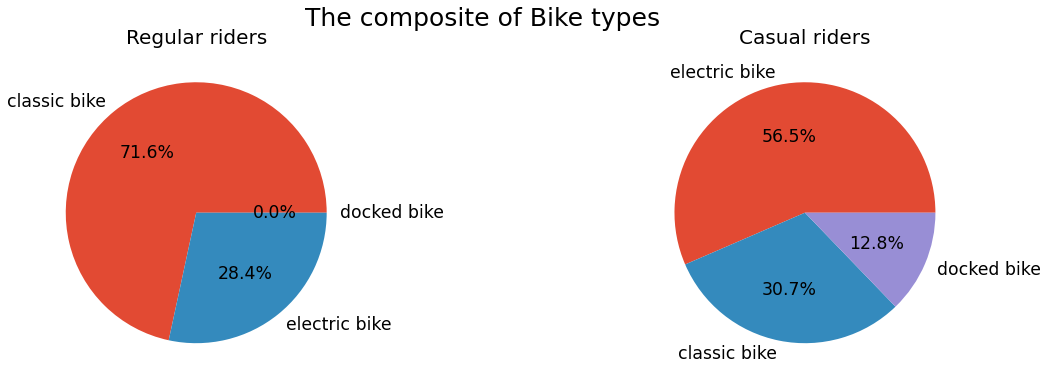

In [60]:
fig = plt.figure(figsize=(20,6))
fig.suptitle('The composite of Bike types', fontsize=25)
plt.subplot(1,2,1)
df_member_rideable = df_member['rideable_type'].value_counts()
labels_member_rideable = ['classic bike','electric bike','docked bike']
patches,texts,autotexts = plt.pie(df_member_rideable,labels=labels_member_rideable,autopct='%3.1f%%')
[x.set_fontsize('xx-large') for x in autotexts]
[x.set_fontsize('xx-large') for x in texts]
plt.title('Regular riders',fontsize=20)

plt.subplot(1,2,2)
df_casual_rideable = df_casual['rideable_type'].value_counts()
labels_casual_rideable = ['electric bike','classic bike','docked bike']
patches,texts,autotexts = plt.pie(df_casual_rideable,labels=labels_casual_rideable,autopct='%1.1f%%')
[x.set_fontsize('xx-large') for x in autotexts]
[x.set_fontsize('xx-large') for x in texts]
plt.title('Casual riders',fontsize=20)

### Registered riders prefer classic bike more than casual riders. It is probably because of different life styles. For example, registered riders need bikes for regular exercises. So further survey regarding the reason of renting a bike needs to be conducted for analysis.  

Text(0, 0.5, 'Count of start station')

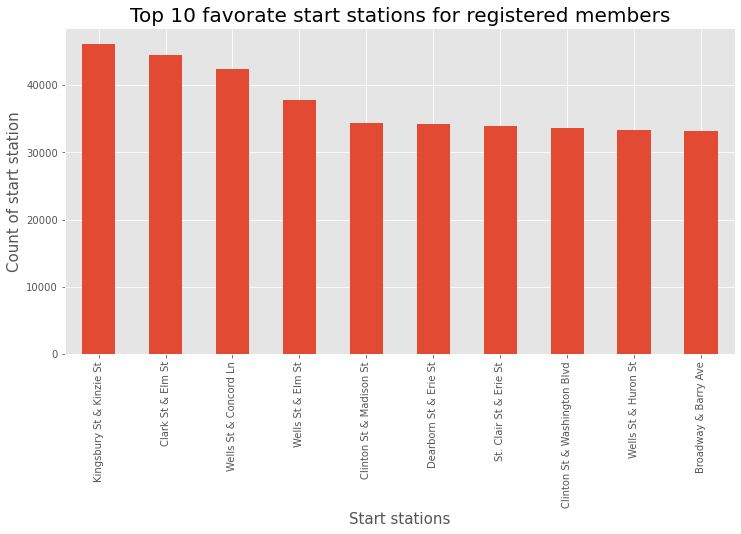

In [64]:
plt.figure(figsize=(12,6))
df_member['start_station_name'].value_counts().iloc[:10].plot.bar()
plt.title('Top 10 favorate start stations for registered members',fontsize=20)
plt.xlabel('Start stations',fontsize=15)
plt.ylabel('Count of start station',fontsize=15)

Text(0, 0.5, 'Counting number of start station')

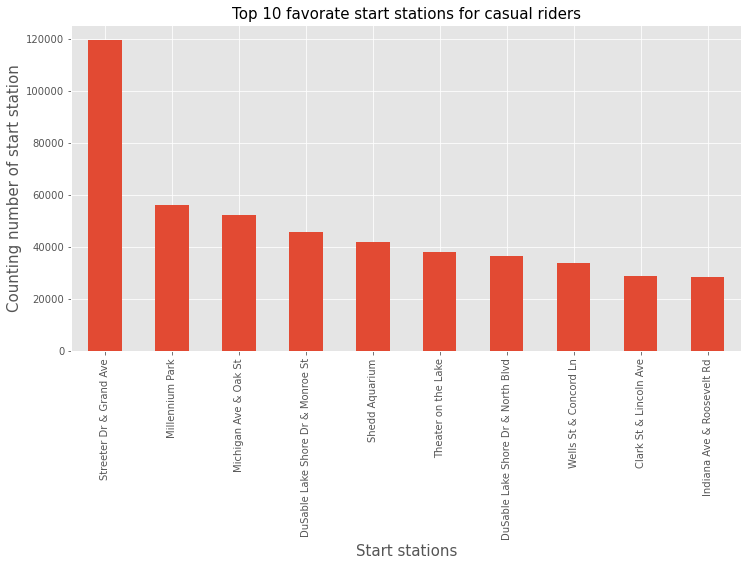

In [65]:
plt.figure(figsize=(12,6))
df_casual['start_station_name'].value_counts().iloc[:10].plot.bar()
plt.title('Top 10 favorate start stations for casual riders',fontsize=15)
plt.xlabel('Start stations',fontsize=15)
plt.ylabel('Counting number of start station',fontsize=15)

In [63]:
df.to_csv("D:/data/tripdata/bike_data.csv")

### Tableau has a good map view for distribution of start station. 
### Please visit tableau public https://public.tableau.com/app/profile/liang7191/viz/trip_map/CNTofstartstation?publish=yes 
### for the published dashboard : the distribution of bike sharing start station  in Chicago

### Here is a snapshot below:

### For register members:

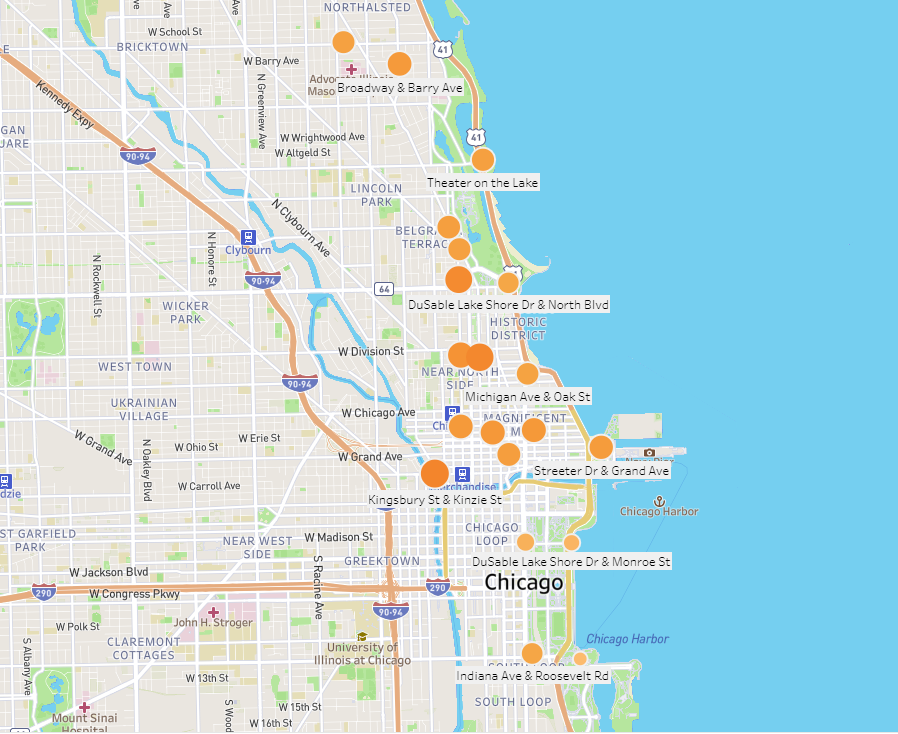

### For casual riders:

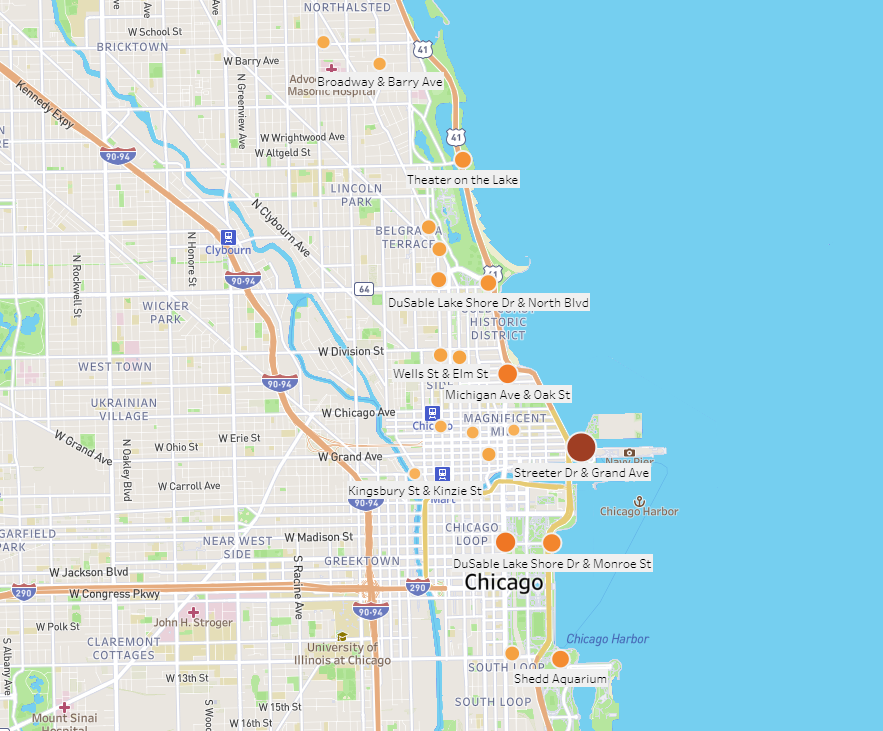